## Update Matplotlib & Seaborn lalu Restart Runtime

In [ ]:
# Setelah update matplotlib, restart runtime sebelum proses import tools lainnya.
!pip install matplotlib --upgrade
%matplotlib inline
!pip install seaborn --upgrade
!pip install pingouin
!pip install python-Levenshtein

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **1. Pernyataan Masalah**
Ada beberapa faktor yang diperhatikan dalam membeli mobil bekas apakah mobil tsb layak dengan harganya atau tidak. Maka, yang perlu dipertanyakan adalah:







*   Apakah harga Yaris Diesel lebih mahal dari Yaris Bensin?;
*   Apakah mileage cukup mempengaruhi harga jual mobil bekas?;
*   Apakah tahun keluaran cukup mempengaruhi harga?;
*   Jika sama-sama berpengaruh, apakah secara langsung tahun keluaran selalu
     berkorelasi negatif terhadap mileage mobil?;
*   Apakah mile per gas turut mempengaruhi harga mobil bekas?





## **2. Persiapan Data & Tools**

### Import Library yang Dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
from Levenshtein import distance
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from itertools import cycle, islice
from statistics import variance
import seaborn as sns
import statsmodels.formula.api as smf
import scipy.stats as stats
import sqlite3 as db

### **2.1 Upload Datadset (jangan lupa buka pane & klik 'Choose Files')**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving toyota.csv to toyota (4).csv


### **2.2 Cek Kondisi DataFrame**

In [ ]:
#@title 2.2.1 Jumlah Baris & Kolom
df = pd.read_csv('toyota.csv')
df.shape

(6738, 9)

In [ ]:
#@title 2.2.2 Pratinjau DataFrame
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [ ]:
#@title 2.2.3 Ragam mobil
df["model"].unique()

array([' GT86', ' Corolla', ' RAV4', ' Yaris', ' Auris', ' Aygo', ' C-HR',
       ' Prius', ' Avensis', ' Verso', ' Hilux', ' PROACE VERSO',
       ' Land Cruiser', ' Supra', ' Camry', ' Verso-S', ' IQ',
       ' Urban Cruiser'], dtype=object)

In [ ]:
#@title 2.2.4 Menghapus spasi kosong pada nama model
df['model'] = df['model'].str.replace(' ', '')
df["model"].unique()

array(['GT86', 'Corolla', 'RAV4', 'Yaris', 'Auris', 'Aygo', 'C-HR',
       'Prius', 'Avensis', 'Verso', 'Hilux', 'PROACEVERSO', 'LandCruiser',
       'Supra', 'Camry', 'Verso-S', 'IQ', 'UrbanCruiser'], dtype=object)

In [ ]:
#@title 2.2.5 Jenis bahan bakar
df["fuelType"].unique()

array(['Petrol', 'Other', 'Hybrid', 'Diesel'], dtype=object)

In [ ]:
#@title 2.2.6 Melihat jarak tempuh per gallon bahan bakar
df["mpg"].unique()

array([ 36.2,  33.2,  32.8,  39.8,  85.6,  36.7,  72.4,  39.2,  78.5,
        58.9,  53.3,  62.8,  56.5,  57.7,  37.2,  34.5,  35.3,  40.4,
        51.1,  57.6,  60.1,  55.4,  42.2,  43.5,  53. ,  49.6,  52.3,
        48.7,  42.8,  47.1,  38.2,  31.4,  32.1,  30.4,  47.9,  78. ,
        76.3,  58. ,  65.7,  55. ,  86. ,  66. ,  80.7,  51.4,  67.3,
        74.3,  42.9,  54.3,  50.4,  37.7,  44.8,  76.4,  70.6,  61.4,
        46.3,  65.6,  83.1,  68.8,  51.3,  40.9,  68.9,  69. ,  67. ,
        41.5,   6. ,  94.1,  64.2, 235. , 217.3, 134.5,  44.1,  45.6,
        30.7,  38.7,   2.8,  30.1,  34.9,  31. ,  27.2,  23.9,  29.7])

In [ ]:
#@title 2.2.7 Menyaring data mobil dengan mile per gallon >= 65 km
data = df[df['mpg'] >= 65]
data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73,Corolla,2019,22500,Automatic,8006,Other,140,85.6,1.8
75,Corolla,2019,20250,Automatic,7445,Hybrid,140,85.6,1.8
76,Corolla,2020,26980,Automatic,5000,Hybrid,135,72.4,2.0
77,Corolla,2019,21995,Automatic,8789,Hybrid,135,85.6,1.8
79,Corolla,2019,22498,Automatic,9798,Hybrid,135,78.5,1.8
...,...,...,...,...,...,...,...,...,...
6418,Avensis,2017,10499,Manual,32819,Diesel,20,67.3,1.6
6419,Avensis,2016,10868,Manual,32626,Diesel,20,67.3,1.6
6422,Avensis,2016,7950,Manual,59244,Diesel,20,67.3,1.6
6727,IQ,2009,3495,Manual,43000,Petrol,0,65.7,1.0


In [ ]:
#@title 2.2.8 Melihat mobil apa saja yang muncul dengan MPG >= 65 km
data["model"].unique()

array(['Corolla', 'Yaris', 'Auris', 'Aygo', 'C-HR', 'Prius', 'Avensis',
       'IQ'], dtype=object)

In [ ]:
#@title 2.2.9 Menyeleksi model mobil & jenis bahan bakar yang dikehendaki
cars = ['Yaris', 'Auris', 'Aygo', 'C-HR', 'Avensis', 'IQ']
data = df.loc[df["model"].isin(cars) & df["fuelType"].isin(["Petrol", "Diesel"])]
data_yaris = data[data["model"] == "Yaris"].reset_index(drop=True)
data_yaris

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Yaris,2019,14000,Automatic,6821,Petrol,150,47.9,1.5
1,Yaris,2018,10750,Manual,14000,Petrol,145,58.9,1.5
2,Yaris,2017,8750,Manual,32594,Petrol,150,58.9,1.5
3,Yaris,2020,14750,Manual,574,Petrol,150,47.9,1.5
4,Yaris,2018,12250,Manual,6821,Petrol,145,56.5,1.5
...,...,...,...,...,...,...,...,...,...
1550,Yaris,2018,9740,Manual,19377,Petrol,145,58.9,1.5
1551,Yaris,2017,8995,Manual,21049,Petrol,30,58.0,1.3
1552,Yaris,2013,8695,Automatic,39364,Petrol,30,55.4,1.3
1553,Yaris,2014,7200,Manual,28801,Petrol,30,58.9,1.0


In [ ]:
#@title 2.2.10 Label Encoder untuk mengubah string fuelType menjadi numerik
# 0 untuk Diesel & 1 untuk Petrol
from sklearn.preprocessing import LabelEncoder

# Create LabelEncoder Object and transform the fuelType variable
data_yaris["fuelType"] = LabelEncoder().fit_transform(data_yaris["fuelType"])

# Display the 5th first row after transforming
data_yaris.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Yaris,2019,14000,Automatic,6821,1,150,47.9,1.5
1,Yaris,2018,10750,Manual,14000,1,145,58.9,1.5
2,Yaris,2017,8750,Manual,32594,1,150,58.9,1.5
3,Yaris,2020,14750,Manual,574,1,150,47.9,1.5
4,Yaris,2018,12250,Manual,6821,1,145,56.5,1.5


In [ ]:
#@title 2.2.11 Label Encoder untuk mengubah string tranmission menjadi numerik
# 0 untuk Automatic & 1 untuk Manual
from sklearn.preprocessing import LabelEncoder

# Create LabelEncoder Object and transform the transmission variable
data_yaris["transmission"] = LabelEncoder().fit_transform(data_yaris["transmission"])

# Display the 5th first row after transforming
data_yaris.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Yaris,2019,14000,0,6821,1,150,47.9,1.5
1,Yaris,2018,10750,1,14000,1,145,58.9,1.5
2,Yaris,2017,8750,1,32594,1,150,58.9,1.5
3,Yaris,2020,14750,1,574,1,150,47.9,1.5
4,Yaris,2018,12250,1,6821,1,145,56.5,1.5


In [ ]:
#@title 2.2.12 Cek jenis data pada kolom fuelType
print(data_yaris["fuelType"].dtype)

int64


In [ ]:
#@title 2.2.13 Info Data setelah pemilahan
data_yaris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1555 entries, 0 to 1554
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         1555 non-null   object 
 1   year          1555 non-null   int64  
 2   price         1555 non-null   int64  
 3   transmission  1555 non-null   int64  
 4   mileage       1555 non-null   int64  
 5   fuelType      1555 non-null   int64  
 6   tax           1555 non-null   int64  
 7   mpg           1555 non-null   float64
 8   engineSize    1555 non-null   float64
dtypes: float64(2), int64(6), object(1)
memory usage: 109.5+ KB


## **3. Pengolahan Data**

In [ ]:
#@title Membuat fungsi koefisien & standard error
def print_coef_std_err(results):
    """
    Function to combine estimated coefficients and standard error in one DataFrame
    :param results: <statsmodels RegressionResultsWrapper> OLS regression results from
    :return data: <pandas DataFrame>
    """
    coef = results.params
    std_err = results.bse

    data = pd.DataFrame(data = np.transpose([coef, std_err]),
                      index = coef.index,
                      columns=["coef","std err"])
    return data

### **3.1 Uji Statistik**

#### **3.1.1 Uji Statistik: Harga Yaris Diesel lebih Mahal dari Yaris Bensin**

Uji hipotesis rata-rata dua populasi/sampel dengan distribusi t:
$$ t = \frac{\bar{x_1}-\bar{x_1}}{\sqrt{s^2/n_1+s^2/n_2}}$$

Maka hipotesis yang akan kita uji adalah:

$$H_0: \bar{x_1} \leq \bar{x_2}$$

$$H_1: \bar{x_1} > \bar{x_2}$$

In [ ]:
#@title Mencari nilai kritis t
from statsmodels.stats.weightstats import ttest_ind
import scipy.stats as stats
from scipy.stats import ttest_ind

t_crit = stats.t.ppf(q=1-.05,df=273)
t_crit

1.6504543030215924

In [ ]:
#@title Tabulasi Harga Yaris Diesel
data_harga_diesel = pd.DataFrame(data_yaris, columns = ['price, fuelType'])
harga_yaris_diesel = data_yaris.loc[data_yaris['fuelType'] == 0]
harga_yaris_diesel.rename(columns = {'price' : 'Diesel'}, inplace = True)
harga_yaris_diesel = harga_yaris_diesel.reset_index()
harga_yaris_diesel = harga_yaris_diesel[['Diesel']]
harga_yaris_diesel.head()

<ipython-input-19-64bef56b3155>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  harga_yaris_diesel.rename(columns = {'price' : 'Diesel'}, inplace = True)


,Diesel
0,7495
1,4698
2,5495
3,8995
4,8295


In [ ]:
#@title Tabulasi Harga Yaris Bensin
data_harga_bensin = pd.DataFrame(data_yaris, columns = ['price, fuelType'])
harga_yaris_bensin = data_yaris.loc[data_yaris['fuelType'] == 1]
harga_yaris_bensin.rename(columns = {'price' : 'Bensin'}, inplace = True)
harga_yaris_bensin = harga_yaris_bensin.reset_index()
harga_yaris_bensin = harga_yaris_bensin[['Bensin']]
harga_yaris_bensin.head()

<ipython-input-20-2246ebea654a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  harga_yaris_bensin.rename(columns = {'price' : 'Bensin'}, inplace = True)


,Bensin
0,14000
1,10750
2,8750
3,14750
4,12250


In [ ]:
#@title Cek varians kedua populasi
np.var(harga_yaris_diesel['Diesel']), np.var(harga_yaris_bensin['Bensin'])

(2407780.140495868, 6386050.080831832)

In [ ]:
#@title Uji T & p-value Yaris Diesel lebih mahal dari Yaris Bensin
alpha = 0.05
x1 = harga_yaris_diesel['Diesel'].mean()
x2 = harga_yaris_bensin['Bensin'].mean()
sd1 = harga_yaris_diesel['Diesel'].std()
sd2 = harga_yaris_bensin['Bensin'].std()
n1 = len(harga_yaris_diesel)
n2 = len(harga_yaris_bensin)

# Interpretasi hasil Uji T dengan scipy.stats
stat, p = ttest_ind(
    harga_yaris_diesel['Diesel'],
    harga_yaris_bensin['Bensin'],
    equal_var=False,
    alternative='greater'
    )

result = ttest_ind(
    harga_yaris_diesel['Diesel'],
    harga_yaris_bensin['Bensin'],
    equal_var=False,
    alternative='greater'
    )
print('Uji T = %.4f, p-value = %.4f' % (stat, p))
print(f"Rata-rata Yaris Diesel = {x1:.2f} & Yaris Bensin = {x2:.2f}")
if stat > alpha:
  print("Harga Yaris diesel terbukti lebih mahal dari Yaris bensin(Tolak H0)")
else:
  print("Harga Yaris diesel tidak terbukti lebih mahal dari Yaris bensin(Gagal tolak H0)")

Uji T = -10.1073, p-value = 1.0000
Rata-rata Yaris Diesel = 6540.36 & Yaris Bensin = 10024.45
Harga Yaris diesel tidak terbukti lebih mahal dari Yaris bensin(Gagal tolak H0)


In [ ]:
p

0.9999999996165907

In [ ]:
stat

-10.107321543666185

In [ ]:
#@title Pembuktian manual uji z
import math
uji_z = (x1-x2)/math.sqrt((sd1**2/n1) + (sd2**2/n2))
uji_z

-10.107321543666185

In [ ]:
#@title Pengambilan Keputusan
alpha = 0.05
if stat > alpha:
    print('Harga Yaris Diesel terbukti lebih mahal dari Yaris Bensin (Tolak H0)')
else:
    print('Harga Yaris Diesel tidak terbukti lebih mahal dari Yaris Bensin (Gagal tolak H0)')

Harga Yaris Diesel tidak terbukti lebih mahal dari Yaris Bensin (Gagal tolak H0)


In [ ]:
#@title Pengambilan Keputusan (2)
if p < stat:
  print('Harga Yaris Diesel terbukti lebih mahal dari Yaris Bensin (Tolak H0)')
else:
  print('Harga Yaris Diesel tidak terbukti lebih mahal dari Yaris Bensin (Gagal tolak H0)')


Harga Yaris Diesel tidak terbukti lebih mahal dari Yaris Bensin (Gagal tolak H0)


In [ ]:
#@title Jumlah Data
jumlah_data = len(data_yaris)
jumlah_data

1555

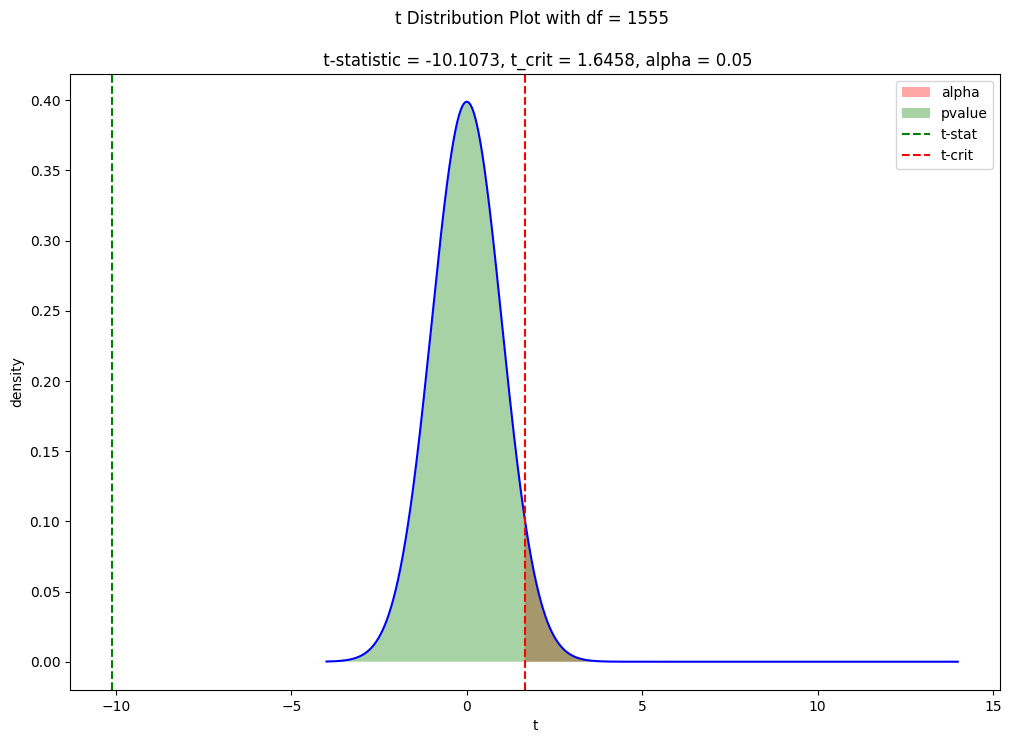

In [ ]:
#@title Visualisasi Distribusi t
jumlah_data = len(data_yaris)
df_data = len(harga_yaris_diesel)+len(harga_yaris_bensin)

plt.figure(figsize=(12,8))

# plot sample distribution
x = np.arange(-4, 14, 0.001)
plt.plot(x, stats.t.pdf(x, jumlah_data),
         color='blue')

# plot alpha region
x_alpha = np.arange(stats.t.ppf(1-alpha, jumlah_data), 4, 0.01)
y_alpha = stats.t.pdf(x_alpha, jumlah_data)
plt.fill_between(x = x_alpha,
                 y1 = y_alpha,
                 facecolor = 'red',
                 alpha = 0.35,
                 label = 'alpha')

# plot pvalue
x_pvalue = np.arange(result.statistic, 4, 0.01)
y_pvalue = stats.t.pdf(x_pvalue, jumlah_data)

plt.fill_between(x = x_pvalue,
                 y1 = y_pvalue,
                 facecolor = 'green',
                 alpha = 0.35,
                 label = 'pvalue')

# plot t-crit and t-stats
plt.axvline(np.round(result.statistic, 4),
            color ="green",
            linestyle = "--",
            label ="t-stat")

t_crit = np.round(stats.t.ppf(1-alpha, jumlah_data), 4)
plt.axvline(t_crit,
            color ="red",
            linestyle = "--",
            label ="t-crit")

plt.legend()
plt.xlabel("t")
plt.ylabel("density")


plt.title(f't Distribution Plot with df = {jumlah_data} \n\n t-statistic = {np.round(result.statistic, 4)}, t_crit = {np.round(t_crit,4)}, alpha = {alpha}');

#### **3.1.2 Uji Statistik: MPG Yaris Diesel lebih jauh daripada Yaris MPG Bensin**

In [ ]:
#@title Tabulasi MPG Yaris Diesel
data_mpg_diesel = pd.DataFrame(data_yaris, columns = ['mpg, fuelType'])
mpg_yaris_diesel = data_yaris.loc[data_yaris['fuelType'] == 0]
mpg_yaris_diesel.rename(columns = {'mpg' : 'Diesel'}, inplace = True)
mpg_yaris_diesel = mpg_yaris_diesel.reset_index()
mpg_yaris_diesel = mpg_yaris_diesel[['Diesel']]
mpg_yaris_diesel.head()

<ipython-input-30-2674c549936c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mpg_yaris_diesel.rename(columns = {'mpg' : 'Diesel'}, inplace = True)


,Diesel
0,80.7
1,72.4
2,72.4
3,80.7
4,80.7


In [ ]:
#@title Tabulasi MPG Yaris Bensin
data_mpg_bensin = pd.DataFrame(data_yaris, columns = ['mpg, fuelType'])
mpg_yaris_bensin = data_yaris.loc[data_yaris['fuelType'] == 1]
mpg_yaris_bensin.rename(columns = {'mpg' : 'Bensin'}, inplace = True)
mpg_yaris_bensin = mpg_yaris_bensin.reset_index()
mpg_yaris_bensin = mpg_yaris_bensin[['Bensin']]
mpg_yaris_bensin.head()

<ipython-input-31-7af9c58e73ff>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mpg_yaris_bensin.rename(columns = {'mpg' : 'Bensin'}, inplace = True)


,Bensin
0,47.9
1,58.9
2,58.9
3,47.9
4,56.5


In [ ]:
#@title Cek varians kedua populasi
np.var(mpg_yaris_diesel['Diesel']), np.var(mpg_yaris_bensin['Bensin'])

(24.358181818181823, 28.28815476350045)

In [ ]:
#@title Uji T & p-value MPG Yaris Diesel lebih jauh dari Yaris Bensin
x1 = mpg_yaris_diesel['Diesel'].mean()
x2 = mpg_yaris_bensin['Bensin'].mean()
sd1 = mpg_yaris_diesel['Diesel'].std()
sd2 = mpg_yaris_bensin['Bensin'].std()
n1 = len(mpg_yaris_diesel)
n2 = len(mpg_yaris_bensin)

# Interpretasi hasil Uji T dengan scipy.stats
stat, p = ttest_ind(
    mpg_yaris_diesel['Diesel'],
    mpg_yaris_bensin['Bensin'],
    equal_var=False,
    alternative='greater'
    )

result = ttest_ind(
    mpg_yaris_diesel['Diesel'],
    mpg_yaris_bensin['Bensin'],
    equal_var=False,
    alternative='greater'
    )
print("alpha = 0.05")
print('Uji T = %.4f, p-value = %.4f' % (stat, p))
print(f"Rata-rata MPG Yaris Diesel = {x1:.2f} & MPG Yaris Bensin = {x2:.2f}")
if stat > alpha:
  print("MPG Yaris diesel terbukti lebih jauh dari Yaris bensin(Tolak H0)")
else:
  print("MPG Yaris diesel tidak terbukti lebih jauh dari Yaris bensin(Gagal tolak H0)")

alpha = 0.05
Uji T = 19.7890, p-value = 0.0000
Rata-rata MPG Yaris Diesel = 76.20 & MPG Yaris Bensin = 54.72
MPG Yaris diesel terbukti lebih jauh dari Yaris bensin(Tolak H0)


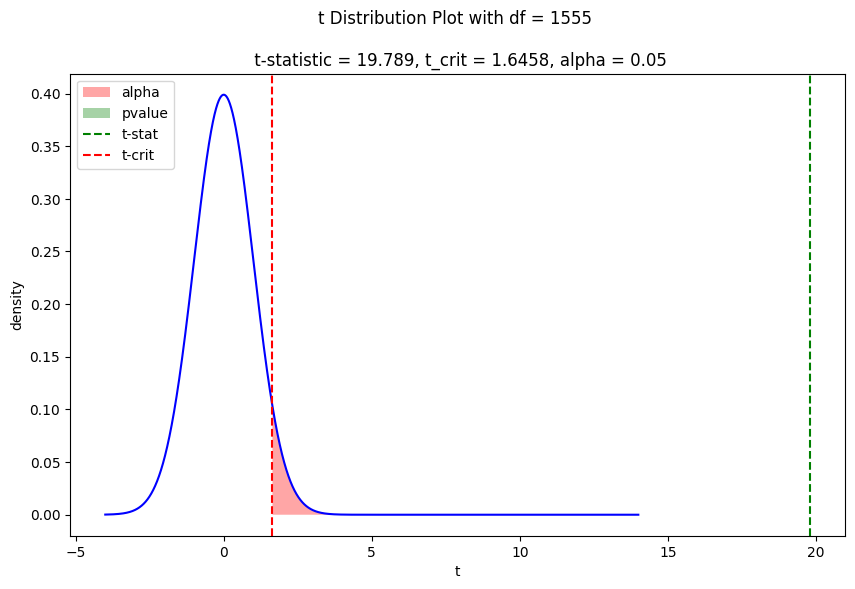

In [ ]:
jumlah_data = len(data_yaris)
df_data = len(mpg_yaris_diesel)+len(mpg_yaris_bensin)

plt.figure(figsize=(10,6))

# plot sample distribution
x = np.arange(-4, 14, 0.001)
plt.plot(x, stats.t.pdf(x, jumlah_data),
         color='blue')

# plot alpha region
x_alpha = np.arange(stats.t.ppf(1-alpha, jumlah_data), 4, 0.01)
y_alpha = stats.t.pdf(x_alpha, jumlah_data)
plt.fill_between(x = x_alpha,
                 y1 = y_alpha,
                 facecolor = 'red',
                 alpha = 0.35,
                 label = 'alpha')

# plot pvalue
x_pvalue = np.arange(result.statistic, 4, 0.01)
y_pvalue = stats.t.pdf(x_pvalue, jumlah_data)

plt.fill_between(x = x_pvalue,
                 y1 = y_pvalue,
                 facecolor = 'green',
                 alpha = 0.35,
                 label = 'pvalue')

# plot t-crit and t-stats
plt.axvline(np.round(result.statistic, 4),
            color ="green",
            linestyle = "--",
            label ="t-stat")

t_crit = np.round(stats.t.ppf(1-alpha, jumlah_data), 4)
plt.axvline(t_crit,
            color ="red",
            linestyle = "--",
            label ="t-crit")

plt.legend()
plt.xlabel("t")
plt.ylabel("density")


plt.title(f't Distribution Plot with df = {jumlah_data} \n\n t-statistic = {np.round(result.statistic, 4)}, t_crit = {np.round(t_crit,4)}, alpha = {alpha}');

### **3.2 Korelasi & Regresi**

#### **3.2.1 Harga vs Mileage**

In [ ]:
#@title Mengolah Fit Linear Regression (Ordinary Least Square) - Harga vs Mileage & Bahan Bakar
# Create OLS model object
model = smf.ols("price ~ mileage + fuelType + mileage:fuelType", data_yaris)

# Fit the model
results_price_1 = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_mileage_fuelType_inter_price = print_coef_std_err(results_price_1)

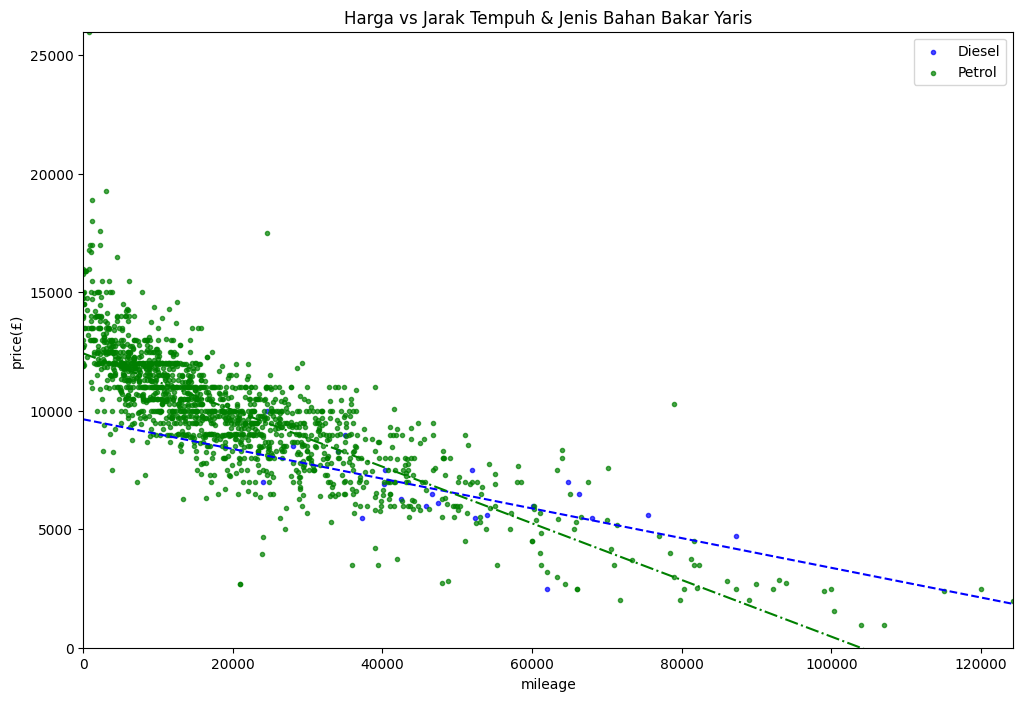

In [ ]:
#@title Visualisasi Data
predictors = ["mileage", "fuelType", "mileage:fuelType"]
outcome = "price"
data_yaris = data_yaris.copy()
results_ = results_mileage_fuelType_inter_price.copy()
linestyles = {0 : "--", 1: "-."}
c = {0 : "b", 1: "g"}
markers = {0 : ".", 1: "."}
fuelType_labels = {0: "Diesel", 1: "Petrol"}

plt.figure(figsize=(12,8))

# Plot the data
for i in range(2):
    plt.scatter(data_yaris[data_yaris[predictors[1]]==i][predictors[0]], data_yaris[data_yaris[predictors[1]]==i][outcome],
            color = c[i], alpha=0.7, marker = markers[i], label=fuelType_labels[i])

x_domain = np.linspace(np.min(data_yaris[predictors[0]]), np.max(data_yaris[predictors[0]]), 100)

# Calculate the fitted values for two lines regarding the fuelType
beta0_hat = results_.loc["Intercept"]["coef"]
beta1_hat = results_.loc[predictors[0]]["coef"]
beta2_hat = results_.loc[predictors[1]]["coef"]
beta3_hat = results_.loc[predictors[2]]["coef"]

fitted_values = [beta0_hat +  beta1_hat * x_domain  + beta2_hat * i + beta3_hat * i * x_domain for i in range(2)]

# Plot two fitted line
for i in range(2):
    plt.plot(x_domain, fitted_values[i], c = c[i], linestyle = linestyles[i])

# Add a legend and labels
plt.legend()
plt.ylabel(f"{outcome}(£)")
plt.xlabel(f"{predictors[0]}")

# Add a title and adjust the margins
plt.title("Harga vs Jarak Tempuh & Jenis Bahan Bakar Yaris")

# Set the x-axis and y-axis limits to be the same
plt.xlim([0, np.max(data_yaris[predictors[0]])])
plt.ylim([0, np.max(data_yaris[outcome])])

# Show the plot
plt.show()

In [ ]:
#@title Interpretasi koefisien Harga vs Mileage
results_mileage_fuelType_inter_price

,coef,std err
Intercept,9640.091075,1023.587875
mileage,-0.062676,0.019659
fuelType,2782.137996,1025.304857
mileage:fuelType,-0.056859,0.019788


$$\text{price} = 9640 - 0.06\text{mileage} + 2782\text{fuelType} - 0.06\text{mileage*fuelType}$$

In [ ]:
#@title Nilai R-Square Harga vs Mileage (nilai korelasi 0 s/d 1)
results_price_1.rsquared

0.654193102688321

In [ ]:
#@title Nilai "Pearson Correlation" Harga vs Mileage
data_yaris[['mileage', 'price']].corr()

,mileage,price
mileage,1.000000,-0.807683
price,-0.807683,1.000000


#### **3.2.2 Harga vs MPG**

In [ ]:
#@title Mengolah Fit Linear Regression (Ordinary Least Square) - Harga vs MPG & Bahan Bakar
# Create OLS model object
model = smf.ols("price ~ mpg + fuelType + mpg:fuelType", data_yaris)

# Fit the model
results_price_2 = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_mpg_fuelType_inter_price = print_coef_std_err(results_price_2)

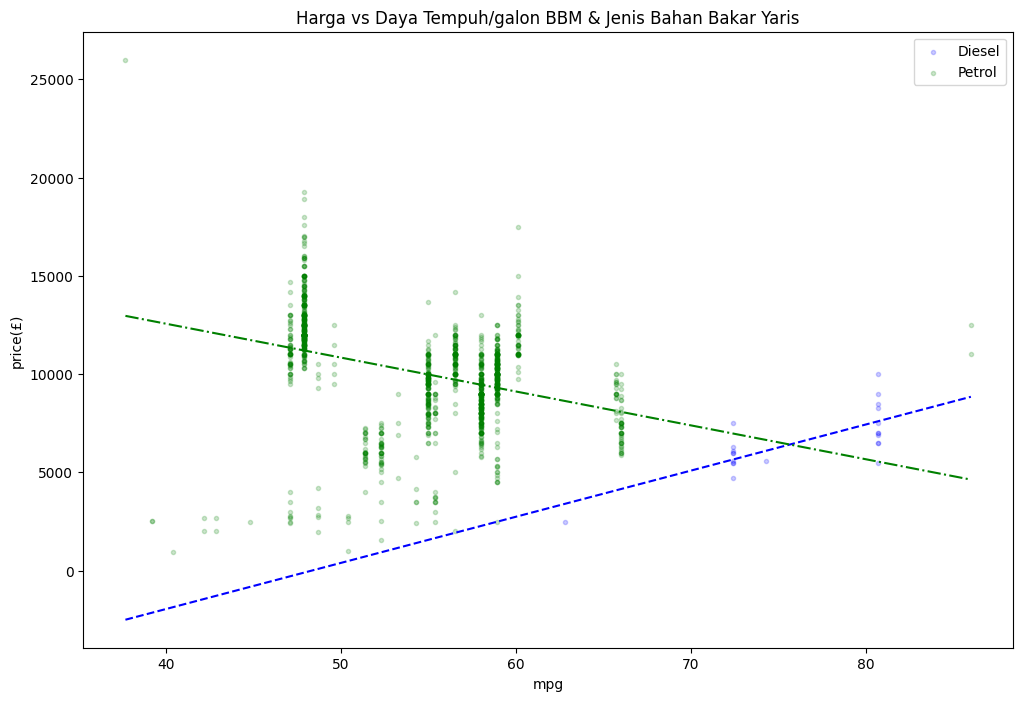

In [ ]:
#@title Visualisasi Data
predictors = ["mpg", "fuelType", "mpg:fuelType"]
outcome = "price"
data_yaris = data_yaris.copy()
results_ = results_mpg_fuelType_inter_price.copy()
linestyles = {0 : "--", 1: "-."}
c = {0 : "b", 1: "g"}
markers = {0 : ".", 1: "."}
fuelType_labels = {0: "Diesel", 1: "Petrol"}

plt.figure(figsize=(12,8))

# Plot the data
for i in range(2):
    plt.scatter(data_yaris[data_yaris[predictors[1]]==i][predictors[0]], data_yaris[data_yaris[predictors[1]]==i][outcome],
            color = c[i], alpha=0.2, marker = markers[i], label=fuelType_labels[i])

x_domain = np.linspace(np.min(data_yaris[predictors[0]]), np.max(data_yaris[predictors[0]]), 100)

# Calculate the fitted values for two lines regarding the fuelType
beta0_hat = results_.loc["Intercept"]["coef"]
beta1_hat = results_.loc[predictors[0]]["coef"]
beta2_hat = results_.loc[predictors[1]]["coef"]
beta3_hat = results_.loc[predictors[2]]["coef"]

fitted_values = [beta0_hat +  beta1_hat * x_domain  + beta2_hat * i + beta3_hat * i * x_domain for i in range(2)]

# Plot two fitted line
for i in range(2):
    plt.plot(x_domain, fitted_values[i], c = c[i], linestyle = linestyles[i])

# Add a legend and labels
plt.legend()
plt.ylabel(f"{outcome}(£)")
plt.xlabel(f"{predictors[0]}")

# Add a title and adjust the margins
plt.title("Harga vs Daya Tempuh/galon BBM & Jenis Bahan Bakar Yaris")

# Show the plot
plt.show()

In [ ]:
#@title Nilai R-Square MPG vs Harga (nilai korelasi 0 s/d 1)
results_price_2.rsquared

0.156683267363107

In [ ]:
#@title Nilai "Pearson Correlation" Harga vs MPG
data_yaris[['mpg', 'price']].corr()

,mpg,price
mpg,1.000000,-0.384664
price,-0.384664,1.000000


#### **3.2.1 Mileage vs Tahun & Bahan Bakar**

In [ ]:
#@title Mengolah Fit Linear Regression (Ordinary Least Square) - Mileage vs Tahun Keluaran & Bahan Bakar
# Create OLS model object
model = smf.ols("mileage ~ year + fuelType + year:fuelType", data_yaris)

# Fit the model
results_mileage_year = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_year_fuelType_inter_mileage = print_coef_std_err(results_mileage_year)

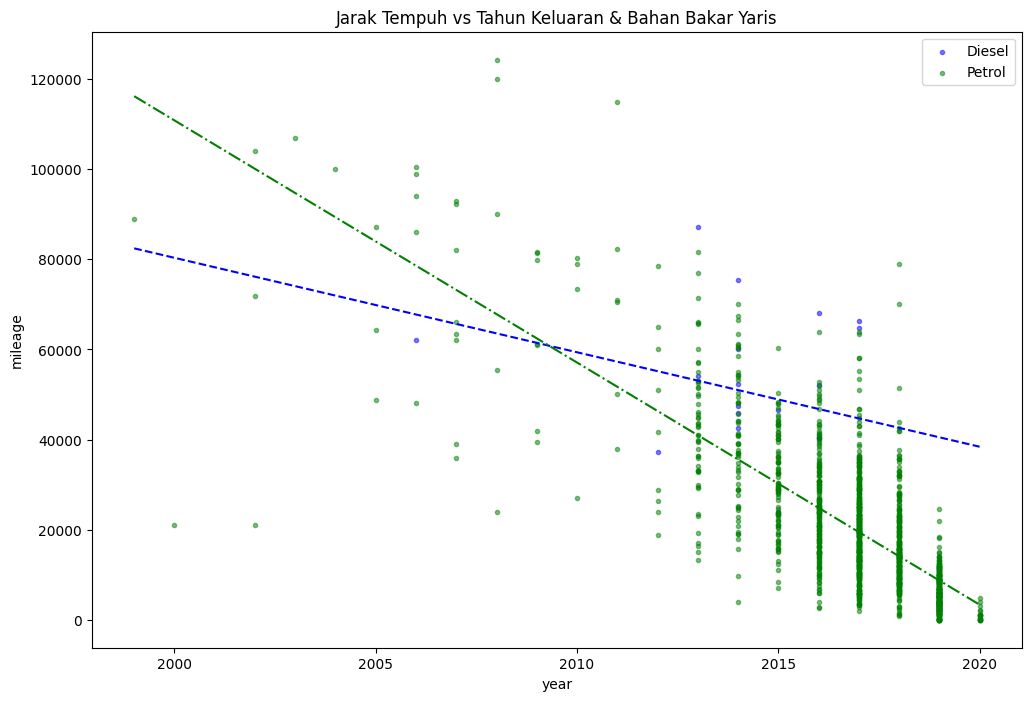

In [ ]:
#@title Visualisasi Data
predictors = ["year", "fuelType", "year:fuelType"]
outcome = "mileage"
data_yaris = data_yaris.copy()
results_ = results_year_fuelType_inter_mileage.copy()
linestyles = {0 : "--", 1: "-."}
c = {0 : "b", 1: "g"}
markers = {0 : ".", 1: "."}
fuelType_labels = {0: "Diesel", 1: "Petrol"}

plt.figure(figsize=(12, 8))

# Plot the data
for i in range(2):
    plt.scatter(data_yaris[data_yaris[predictors[1]]==i][predictors[0]], data_yaris[data_yaris[predictors[1]]==i][outcome],
            color = c[i], alpha=0.5, marker = markers[i], label=fuelType_labels[i])

x_domain = np.linspace(np.min(data_yaris[predictors[0]]), np.max(data_yaris[predictors[0]]), 100)

# Calculate the fitted values for two lines regarding the fuelType
beta0_hat = results_.loc["Intercept"]["coef"]
beta1_hat = results_.loc[predictors[0]]["coef"]
beta2_hat = results_.loc[predictors[1]]["coef"]
beta3_hat = results_.loc[predictors[2]]["coef"]

fitted_values = [beta0_hat +  beta1_hat * x_domain  + beta2_hat * i + beta3_hat * i * x_domain for i in range(2)]

# Plot two fitted line
for i in range(2):
    plt.plot(x_domain, fitted_values[i], c = c[i], linestyle = linestyles[i])

# Add a legend and labels
plt.legend()
plt.ylabel(f"{outcome}")
plt.xlabel(f"{predictors[0]}")

# Add a title and adjust the margins
plt.title("Jarak Tempuh vs Tahun Keluaran & Bahan Bakar Yaris")

# Show the plot
plt.show()

In [ ]:
#@title Interpretasi koefisien
results_year_fuelType_inter_mileage

,coef,std err
Intercept,4.274449e+06,1.975567e+06
year,-2.097054e+03,9.805621e+02
fuelType,6.587077e+06,1.990220e+06
year:fuelType,-3.278288e+03,9.878199e+02


In [ ]:
#@title Nilai R-Square (nilai korelasi 0 s/d 1)
results_mileage_year.rsquared

0.5839209946992807

#### **3.2.2 Harga vs Tahun Yaris**

In [ ]:
#@title Mengolah Fit Linear Regression (Ordinary Least Square) - Harga vs Tahun Keluaran & Bahan Bakar
# Create OLS model object
model = smf.ols("price ~ year + fuelType + year:fuelType", data_yaris)

# Fit the model
results_price_3 = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_year_fuelType_inter_price = print_coef_std_err(results_price_3)

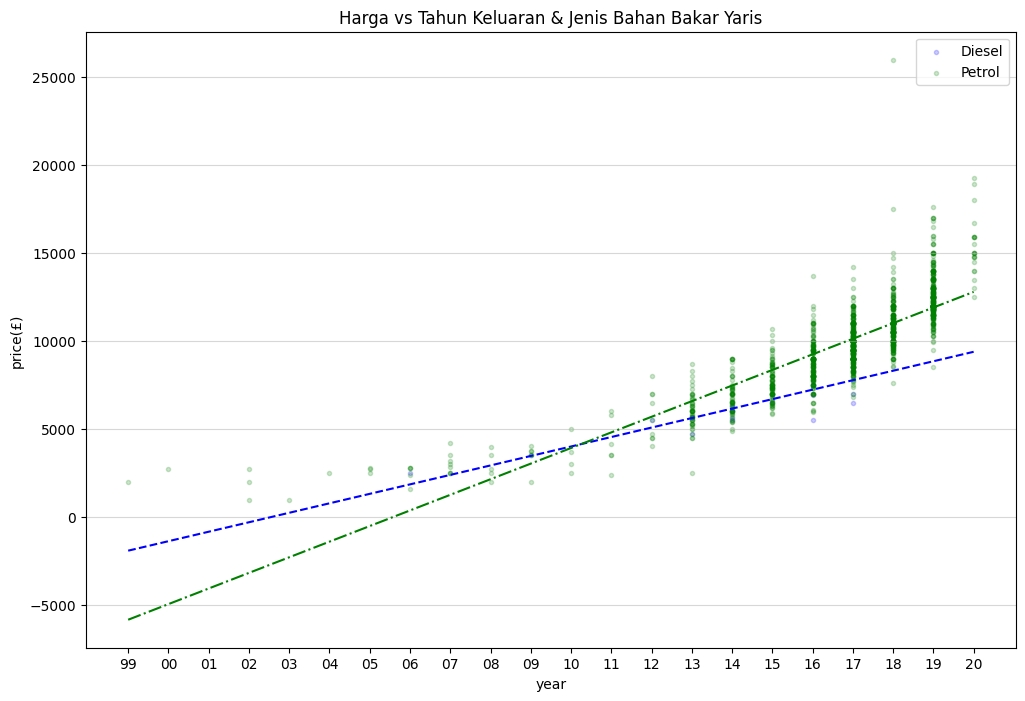

In [ ]:
#@title Visualisasi Data
predictors = ["year", "fuelType", "year:fuelType"]
outcome = "price"
data_yaris = data_yaris.copy()
results_ = results_year_fuelType_inter_price.copy()
linestyles = {0 : "--", 1: "-."}
c = {0 : "b", 1: "g"}
markers = {0 : ".", 1: "."}
fuelType_labels = {0: "Diesel", 1: "Petrol"}

plt.figure(figsize=(12,8))

# Plot the data
for i in range(2):
    plt.scatter(data_yaris[data_yaris[predictors[1]]==i][predictors[0]], data_yaris[data_yaris[predictors[1]]==i][outcome],
            color = c[i], alpha=0.2, marker = markers[i], label=fuelType_labels[i])

x_domain = np.linspace(np.min(data_yaris[predictors[0]]), np.max(data_yaris[predictors[0]]), 100)

# Calculate the fitted values for two lines regarding the fuelType
beta0_hat = results_.loc["Intercept"]["coef"]
beta1_hat = results_.loc[predictors[0]]["coef"]
beta2_hat = results_.loc[predictors[1]]["coef"]
beta3_hat = results_.loc[predictors[2]]["coef"]

fitted_values = [beta0_hat +  beta1_hat * x_domain  + beta2_hat * i + beta3_hat * i * x_domain for i in range(2)]

# Plot two fitted line
for i in range(2):
    plt.plot(x_domain, fitted_values[i], c = c[i], linestyle = linestyles[i])

# Set the x-ticks to show year intervals per 1 year
x_ticks = np.arange(np.min(data[predictors[0]]), np.max(data[predictors[0]]) + 1, 1)
x_ticks_simplified = [str(year)[-2:] for year in x_ticks]
plt.xticks(x_ticks, x_ticks_simplified)


# Add grid lines
plt.grid(axis='y', alpha=0.5)

# Add a legend and labels
plt.legend()
plt.ylabel(f"{outcome}(£)")
plt.xlabel(f"{predictors[0]}")

# Add a title and adjust the margins
plt.title("Harga vs Tahun Keluaran & Jenis Bahan Bakar Yaris")

# Show the plot
plt.show()

In [ ]:
lowest_price_yaris = df[df['model'] == 'Yaris'].loc[df[df['model'] == 'Yaris']['price'].idxmin()]
print(lowest_price_yaris)

model            Yaris
year              2002
price              950
transmission    Manual
mileage         104000
fuelType        Petrol
tax                200
mpg               40.4
engineSize         1.5
Name: 2447, dtype: object


In [ ]:
#@title Interpretasi koefisien
results_year_fuelType_inter_price

,coef,std err
Intercept,-1.078782e+06,240728.406684
year,5.386946e+02,119.484277
fuelType,-7.021524e+05,242514.003341
year:fuelType,3.492867e+02,120.368657


$$\text{price} = -1,078,782 + 5.39\text{year} - 7.02\text{fuelType} + 3.50\text{year*fuelType}$$

In [ ]:
#@title Nilai R-Square (nilai korelasi 0 s/d 1)
results_price_3.rsquared

0.7143673963458703

In [ ]:
#@title Nilai "Pearson Correlation" Harga vs Mileage
data_yaris[['year', 'price']].corr()

,year,price
year,1.000000,0.841157
price,0.841157,1.000000


#### **3.2.3 MPG vs Mileage Yaris**

In [ ]:
#@title Mengolah Fit Linear Regression (Ordinary Least Square) - Konsumsi vs Mileage & Bahan Bakar
# Create OLS model object
model = smf.ols("mpg ~ mileage + fuelType + mileage:fuelType", data_yaris)

# Fit the model
results_mpg = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_mileage_fuelType_inter_mpg = print_coef_std_err(results_mpg)

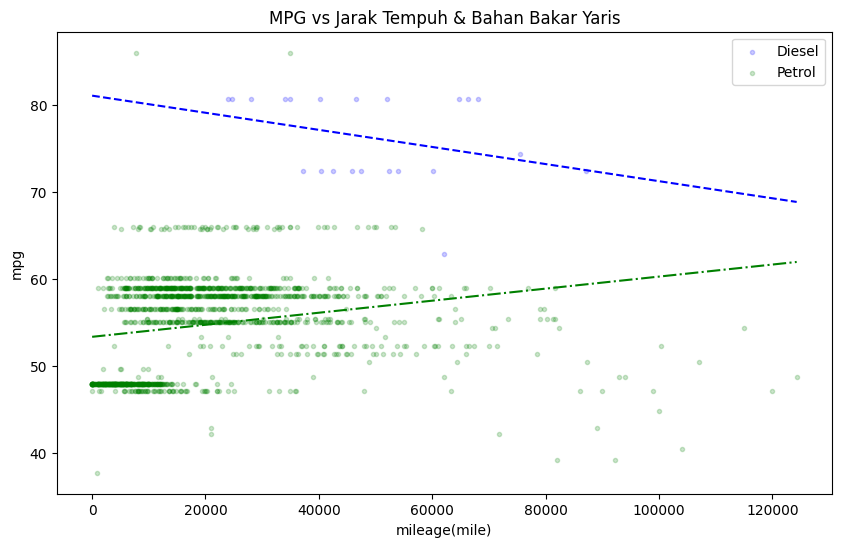

In [ ]:
#@title Visualisasi Data
predictors = ["mileage", "fuelType", "mileage:fuelType"]
outcome = "mpg"
data_yaris = data_yaris.copy()
results_ = results_mileage_fuelType_inter_mpg.copy()
linestyles = {0 : "--", 1: "-."}
c = {0 : "b", 1: "g"}
markers = {0 : ".", 1: "."}
fuelType_labels = {0: "Diesel", 1: "Petrol"}

plt.figure(figsize=(10,6))

# Plot the data
for i in range(2):
    plt.scatter(data_yaris[data_yaris[predictors[1]]==i][predictors[0]], data_yaris[data_yaris[predictors[1]]==i][outcome],
            color = c[i], alpha=0.2, marker = markers[i], label=fuelType_labels[i])

x_domain = np.linspace(np.min(data_yaris[predictors[0]]), np.max(data_yaris[predictors[0]]), 100)

# Calculate the fitted values for two lines regarding the fuelType
beta0_hat = results_.loc["Intercept"]["coef"]
beta1_hat = results_.loc[predictors[0]]["coef"]
beta2_hat = results_.loc[predictors[1]]["coef"]
beta3_hat = results_.loc[predictors[2]]["coef"]

fitted_values = [beta0_hat +  beta1_hat * x_domain  + beta2_hat * i + beta3_hat * i * x_domain for i in range(2)]

# Plot two fitted line
for i in range(2):
    plt.plot(x_domain, fitted_values[i], c = c[i], linestyle = linestyles[i])

# Add a legend and labels
plt.legend()
plt.ylabel(f"{outcome}")
plt.xlabel(f"{predictors[0]}(mile)")

# Add a title and adjust the margins
plt.title("MPG vs Jarak Tempuh & Bahan Bakar Yaris")

# Show the plot
plt.show()

In [ ]:
#@title Interpretasi koefisien
results_mileage_fuelType_inter_mpg

,coef,std err
Intercept,81.063166,3.536736
mileage,-0.000098,0.000068
fuelType,-27.733822,3.542669
mileage:fuelType,0.000168,0.000068


**$$\text{mpg} = 81 + -0.0001\text{mileage} -13.99\text{fuelType} -0.0002\text{mileage*fuelType}$$**

In [ ]:
#@title Nilai R-Square (nilai korelasi 0 s/d 1)
results_mpg.rsquared

0.22607178351382162

In [ ]:
#@title Nilai "Pearson Correlation"
data[['mileage', 'mpg']].corr()

,mileage,mpg
mileage,1.000000,0.135067
mpg,0.135067,1.000000


#### **3.2.4 MPG vs Tahun Yaris**

In [ ]:
#@title Mengolah Fit Linear Regression (Ordinary Least Square) - MPG vs Harga Yaris

# Fit the model
model = smf.ols("mpg ~ year + fuelType + year:fuelType", data_yaris)
results_mpg_year = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_mpg_inter_year = print_coef_std_err(results_mpg_year)

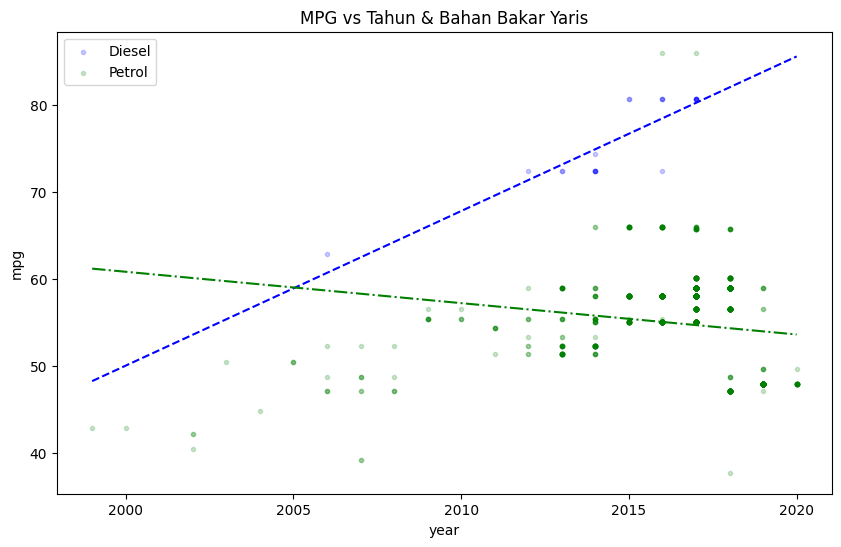

In [ ]:
#@title Visualisasi Data
predictors = ["year", "fuelType", "year:fuelType"]
outcome = "mpg"
data_yaris = data_yaris.copy()
results_ = results_mpg_inter_year.copy()
linestyles = {0 : "--", 1: "-."}
c = {0 : "b", 1: "g"}
markers = {0 : ".", 1: "."}
fuelType_labels = {0: "Diesel", 1: "Petrol"}

plt.figure(figsize=(10,6))

# Plot the data
for i in range(2):
    plt.scatter(data_yaris[data_yaris[predictors[1]]==i][predictors[0]], data_yaris[data_yaris[predictors[1]]==i][outcome],
            color = c[i], alpha=0.2, marker = markers[i], label=fuelType_labels[i])

x_domain = np.linspace(np.min(data_yaris[predictors[0]]), np.max(data_yaris[predictors[0]]), 100)

# Calculate the fitted values for two lines regarding the fuelType
beta0_hat = results_.loc["Intercept"]["coef"]
beta1_hat = results_.loc[predictors[0]]["coef"]
beta2_hat = results_.loc[predictors[1]]["coef"]
beta3_hat = results_.loc[predictors[2]]["coef"]

fitted_values = [beta0_hat +  beta1_hat * x_domain  + beta2_hat * i + beta3_hat * i * x_domain for i in range(2)]

# Plot two fitted line
for i in range(2):
    plt.plot(x_domain, fitted_values[i], c = c[i], linestyle = linestyles[i])

# Add a legend and labels
plt.legend()
plt.ylabel(f"{outcome}")
plt.xlabel(f"{predictors[0]}")

# Add a title and adjust the margins
plt.title("MPG vs Tahun & Bahan Bakar Yaris")

# Show the plot
plt.show()

In [ ]:
#@title Interpretasi koefisien
results_mpg_inter_year

,coef,std err
Intercept,-3506.193026,922.038201
year,1.778103,0.457649
fuelType,4288.379968,928.877395
year:fuelType,-2.138792,0.461036


In [ ]:
#@title Nilai R-Square (nilai korelasi 0 s/d 1)
results_mpg_year.rsquared

0.21446990886157835

#### **3.2.5 Angka Tahun vs Mileage Yaris**

In [ ]:
#@title Mengolah Fit Linear Regression (Ordinary Least Square) - Tahun vs Mileage Yaris

# Fit the model
model = smf.ols("mileage ~ year + fuelType + year:fuelType", data_yaris)
results_mileage_year = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_year_inter_mileage = print_coef_std_err(results_mileage_year)

In [ ]:
data_yaris

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Yaris,2019,14000,0,6821,1,150,47.9,1.5
1,Yaris,2018,10750,1,14000,1,145,58.9,1.5
2,Yaris,2017,8750,1,32594,1,150,58.9,1.5
3,Yaris,2020,14750,1,574,1,150,47.9,1.5
4,Yaris,2018,12250,1,6821,1,145,56.5,1.5
...,...,...,...,...,...,...,...,...,...
1550,Yaris,2018,9740,1,19377,1,145,58.9,1.5
1551,Yaris,2017,8995,1,21049,1,30,58.0,1.3
1552,Yaris,2013,8695,0,39364,1,30,55.4,1.3
1553,Yaris,2014,7200,1,28801,1,30,58.9,1.0


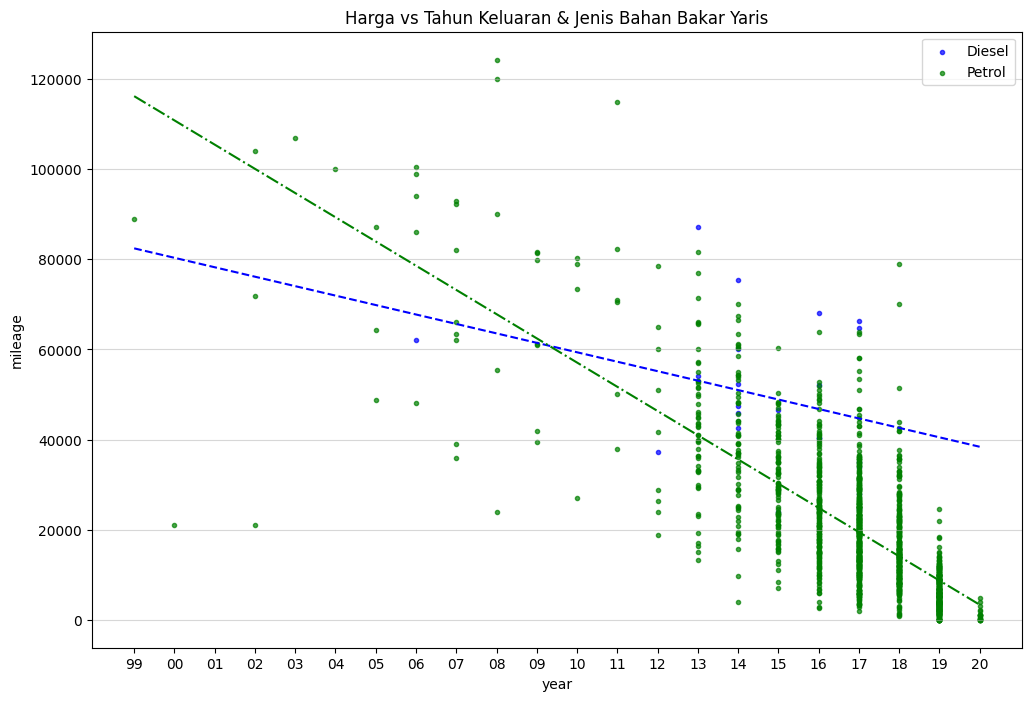

In [ ]:
#@title Visualisasi Data
predictors = ["year", "fuelType", "year:fuelType"]
outcome = "mileage"
data_yaris = data_yaris.copy()
results_ = results_year_inter_mileage.copy()
linestyles = {0 : "--", 1: "-."}
c = {0 : "b", 1: "g"}
markers = {0 : ".", 1: "."}
fuelType_labels = {0: "Diesel", 1: "Petrol"}

plt.figure(figsize=(12,8))

# Plot the data
for i in range(2):
    plt.scatter(data_yaris[data_yaris[predictors[1]]==i][predictors[0]], data_yaris[data_yaris[predictors[1]]==i][outcome],
            color = c[i], alpha=0.7, marker = markers[i], label=fuelType_labels[i])

x_domain = np.linspace(np.min(data_yaris[predictors[0]]), np.max(data_yaris[predictors[0]]), 100)

# Calculate the fitted values for two lines regarding the fuelType
beta0_hat = results_.loc["Intercept"]["coef"]
beta1_hat = results_.loc[predictors[0]]["coef"]
beta2_hat = results_.loc[predictors[1]]["coef"]
beta3_hat = results_.loc[predictors[2]]["coef"]

fitted_values = [beta0_hat +  beta1_hat * x_domain  + beta2_hat * i + beta3_hat * i * x_domain for i in range(2)]

# Plot two fitted line
for i in range(2):
    plt.plot(x_domain, fitted_values[i], c = c[i], linestyle = linestyles[i])

# Set the x-ticks to show year intervals per 1 year
x_ticks = np.arange(np.min(data[predictors[0]]), np.max(data[predictors[0]]) + 1, 1)
x_ticks_simplified = [str(year)[-2:] for year in x_ticks]
plt.xticks(x_ticks, x_ticks_simplified)


# Add grid lines
plt.grid(axis='y', alpha=0.5)

# Add a legend and labels
plt.legend()
plt.ylabel(f"{outcome}")
plt.xlabel(f"{predictors[0]}")

# Add a title and adjust the margins
plt.title("Harga vs Tahun Keluaran & Jenis Bahan Bakar Yaris")

# Show the plot
plt.show()

In [ ]:
#@title Interpretasi korelasi
results_year_inter_mileage

,coef,std err
Intercept,4.274449e+06,1.975567e+06
year,-2.097054e+03,9.805621e+02
fuelType,6.587077e+06,1.990220e+06
year:fuelType,-3.278288e+03,9.878199e+02


In [ ]:
#@title Nilai R-Square Tahun vs Mileage
results_mileage_year.rsquared

0.5839209946992807

In [ ]:
#@title Nilai "Pearson Correlation" Mileage vs Tahun
data_yaris[['mileage', 'year']].corr()

,mileage,year
mileage,1.000000,-0.752521
year,-0.752521,1.000000


#### **3.2.6 Angka Tahun & Transmisi vs MPG Yaris**

In [ ]:
#@title Mengolah Fit Linear Regression (Ordinary Least Square) - Angka Tahun & Transmisi vs MPG Yaris

# Membuat model objek OLS
model = smf.ols("mpg ~ year + transmission + year:transmission", data_yaris)

# Fit the model
results_mpg_year = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_year_transmission_inter_mpg = print_coef_std_err(results_mpg_year)

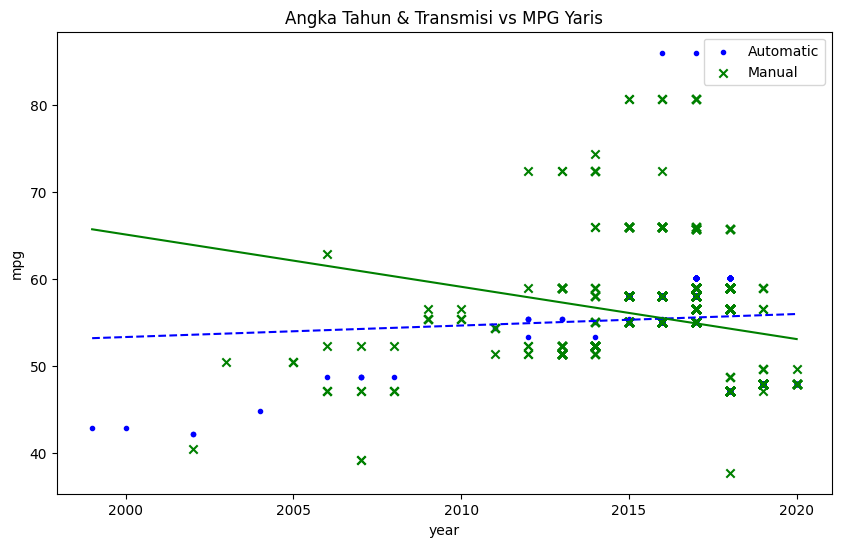

In [ ]:
#@title Visualisasi Data
predictors = ["year", "transmission", "year:transmission"]
outcome = "mpg"
data_yaris = data_yaris.copy()
results_ = results_year_transmission_inter_mpg.copy()
linestyles = {0 : "--", 1: "-"}
c = {0 : "b", 1: "g"}
markers = {0 : ".", 1: "x"}
transmission = {0: "Automatic", 1: "Manual"}

plt.figure(figsize=(10,6))

# Plot the data
for i in range(2):
    plt.scatter(data_yaris[data_yaris[predictors[1]]==i][predictors[0]], data_yaris[data_yaris[predictors[1]]==i][outcome],
                color = c[i], marker = markers[i], label=transmission[i])

x_domain = np.linspace(np.min(data[predictors[0]]), np.max(data[predictors[0]]), 100)

# Calculate the fitted values for two lines regarding the fuelType
beta0_hat = results_.loc["Intercept"]["coef"]
beta1_hat = results_.loc[predictors[0]]["coef"]
beta2_hat = results_.loc[predictors[1]]["coef"]
beta3_hat = results_.loc[predictors[2]]["coef"]

fitted_values = [beta0_hat +  beta1_hat * x_domain  + beta2_hat * i + beta3_hat * i * x_domain for i in range(2)]

# Plot two fitted line
for i in range(2):
    plt.plot(x_domain, fitted_values[i], c = c[i], linestyle = linestyles[i])

# Add a legend and labels
plt.legend()
plt.ylabel(f"{outcome}")
plt.xlabel(f"{predictors[0]}")

# Add a title and adjust the margins
plt.title("Angka Tahun & Transmisi vs MPG Yaris")

# Show the plot
plt.show()

<ipython-input-75-b77cec8c5e54>:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('coolwarm')


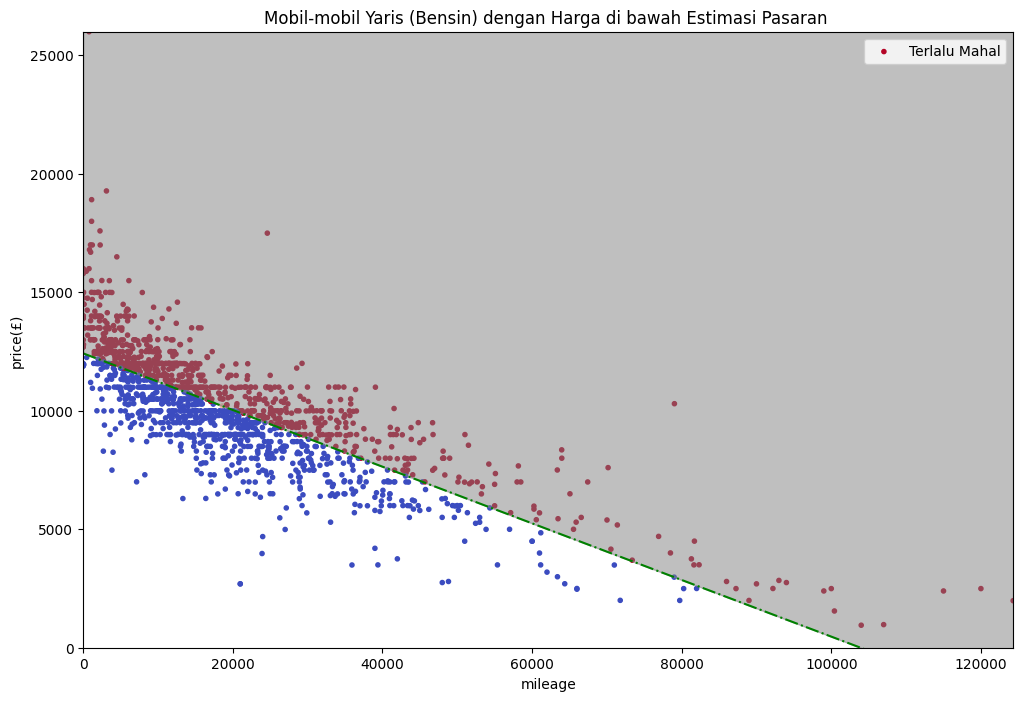

In [ ]:
#@title Visualisasi Data Yaris (Bensin)
import matplotlib.cm as cm

predictors = ["mileage", "fuelType", "mileage:fuelType"]
outcome = "price"
data_yaris = data_yaris.copy()
results_ = results_mileage_fuelType_inter_price.copy()
linestyles = {1: "-."}
c = {1: "g"}
markers = {1: "."}
fuelType_labels = {1: "Petrol"}

plt.figure(figsize=(12, 8))
# Calculate the fitted values & residuals
residuals = data_yaris[outcome] - (beta0_hat + beta1_hat * data_yaris[predictors[0]] + beta2_hat * 1 + beta3_hat * 1 * data_yaris[predictors[0]])

# Define the colormap
cmap = cm.get_cmap('coolwarm')

# Normalize the residuals to the range [-1, 1]
norm = plt.Normalize(-1, 1)

# Plot the petrol data with colors based on the residuals
plt.scatter(data_yaris[data_yaris[predictors[1]]==1][predictors[0]], data_yaris[data_yaris[predictors[1]]==1][outcome],
            c = residuals[data_yaris[predictors[1]]==1], cmap=cmap, norm=norm, alpha=1, marker = markers[1], label=fuelType_labels[1])

x_domain = np.linspace(np.min(data_yaris[predictors[0]]), np.max(data_yaris[predictors[0]]), len(data_yaris))

# Calculate the fitted values for the petrol line only
beta0_hat = results_.loc["Intercept"]["coef"]
beta1_hat = results_.loc[predictors[0]]["coef"]
beta2_hat = results_.loc[predictors[1]]["coef"]
beta3_hat = results_.loc[predictors[2]]["coef"]

fitted_values = [beta0_hat +  beta1_hat * x_domain  + beta2_hat * 1 + beta3_hat * 1 * x_domain]

# Plot the petrol fitted line and the buffer
plt.plot(x_domain, fitted_values[0], c = c[1], linestyle = linestyles[1], label=["Terlalu Mahal"])
plt.fill_between(x_domain, fitted_values[0], np.max(data_yaris[outcome]), color='grey', alpha=0.5)

# Update the legend and labels
plt.legend()
plt.legend(title="Fuel type")
plt.legend(handles=plt.gca().get_legend_handles_labels()[0], labels=["Terlalu Mahal"])
plt.ylabel(f"{outcome}(£)")
plt.xlabel(f"{predictors[0]}")

# Add a title and adjust the margins
plt.title("Mobil-mobil Yaris (Bensin) dengan Harga di bawah Estimasi Pasaran ")

# Set the x-axis and y-axis limits to be the same
plt.xlim([0, np.max(data_yaris[predictors[0]])])
plt.ylim([0, np.max(data_yaris[outcome])])

# Show the plot
plt.show()

In [ ]:
#@title Menambah kolom mileage:fuelType untuk digunakan mendeteksi Mobil di bawah garis regresi
data_yaris["mileage:fuelType"] = data_yaris["mileage"] * data_yaris["fuelType"]
data_yaris

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,mileage:fuelType
0,Yaris,2019,14000,0,6821,1,150,47.9,1.5,6821
1,Yaris,2018,10750,1,14000,1,145,58.9,1.5,14000
2,Yaris,2017,8750,1,32594,1,150,58.9,1.5,32594
3,Yaris,2020,14750,1,574,1,150,47.9,1.5,574
4,Yaris,2018,12250,1,6821,1,145,56.5,1.5,6821
...,...,...,...,...,...,...,...,...,...,...
1550,Yaris,2018,9740,1,19377,1,145,58.9,1.5,19377
1551,Yaris,2017,8995,1,21049,1,30,58.0,1.3,21049
1552,Yaris,2013,8695,0,39364,1,30,55.4,1.3,39364
1553,Yaris,2014,7200,1,28801,1,30,58.9,1.0,28801


In [ ]:
#@title Mengubah fitted_values (prediksi harga) menjadi Data Frame
prediction = (beta0_hat +
                     beta1_hat * data_yaris[predictors[0]] +
                     beta2_hat * data_yaris[predictors[1]] +
                     beta3_hat * data_yaris[predictors[2]])
predicted_values = pd.DataFrame(prediction, columns=['predicted_values'])
predicted_values = predicted_values.sort_values('predicted_values', ascending=False)
predicted_values

,predicted_values
615,12421.990002
441,12421.750932
440,12421.631397
548,12421.631397
470,12421.153257
...,...
1228,-9.410871
1364,-368.015869
1260,-1324.295865
1217,-1921.970862


In [ ]:
#@title Membuat kolom prediksi harga dan selisih harga
# Calculate the price_difference
price_diff = data_yaris['price'] - (beta0_hat + beta1_hat * data_yaris[predictors[0]] +
                                   beta2_hat * data_yaris[predictors[1]] +
                                   beta3_hat * data_yaris[predictors[2]])

# Create a new dataframe with the cars below the regression line

yaris_murah = data_yaris
yaris_murah['predicted_values'] = predicted_values
yaris_murah['price_diff'] = price_diff
yaris_murah = yaris_murah[price_diff<0]
yaris_murah = yaris_murah.sort_values('price_diff', ascending=True)
yaris_murah

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,mileage:fuelType,predicted_values,price_diff
1344,Yaris,2000,2695,0,21000,1,160,42.9,1.3,21000,9911.994083,-7216.994083
1270,Yaris,2002,2695,0,21000,1,200,42.2,1.3,21000,9911.994083,-7216.994083
1324,Yaris,2008,3975,1,23912,1,160,47.1,1.3,23912,9563.908165,-5588.908165
1345,Yaris,2012,4690,0,24000,1,125,53.3,1.3,24000,9553.389085,-4863.389085
1357,Yaris,2007,3491,1,35930,1,160,47.1,1.3,35930,8127.336542,-4636.336542
...,...,...,...,...,...,...,...,...,...,...,...,...
362,Yaris,2019,12180,1,2000,1,145,47.9,1.5,2000,12183.159073,-3.159073
195,Yaris,2015,6998,1,45357,1,30,55.0,1.3,45357,7000.480102,-2.480102
1432,Yaris,2010,2978,1,79000,1,30,55.4,1.3,79000,2978.964115,-0.964115
816,Yaris,2017,9995,1,20300,1,30,55.0,1.3,20300,9995.668583,-0.668583
